In [25]:
%matplotlib inline

In [26]:
import random
import statistics as st
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [27]:
class Player():
    
    def roll(self):
        return random.randint(1, 6)
    
    def roll_again(self, *args):
        return False
    
    def take_a_turn(self):
        turn = 0
        times_rolled = 0 
        
        while True:
            roll = self.roll()
#             print(times_rolled, turn, roll)
            if roll == 1:
                return 0
            else:
                turn += roll
                times_rolled += 1
            
            if not self.roll_again(turn, times_rolled):
                break
        return turn

In [28]:
class Safe(Player):
    
    def roll_again(self, turn, times_rolled):
        if turn < 4:
            return True
        return False

In [29]:
class Risky(Player):
    
    def roll_again(self, turn, times_rolled):
        if turn < 35:
            return True

In [30]:
class RollsToTwenty(Player):
    
    def roll_again(self, turn, times_rolled):
        if turn < 20:
            return True
        return False

In [31]:
class RollsFourTimes(Player):
    
    def roll_again(self, turn, times_rolled):
        if times_rolled == 4:
            return False
        return True

In [32]:
class TheThinker(Player):
        
    def roll_again(self, turn, times_rolled):
        if turn > 20 or times_rolled == 4:
            return False
        return True

In [33]:
def play_pig_solitaire(player):
    game_total = 0
    
    for _ in range(7):
        turn = player.take_a_turn()
        game_total += turn
#         print(turn)

    return game_total

risky_chick = Risky()
print(play_pig_solitaire(risky_chick))

39


In [47]:
hans_solo = Player()
risky_chick = Risky()
safe_sam = Safe()
tammy = RollsToTwenty()
tony = RollsFourTimes()
tommi = TheThinker()
print(play_pig_solitaire(hans_solo))
print(play_pig_solitaire(risky_chick))
print(play_pig_solitaire(safe_sam))
print(play_pig_solitaire(tammy))
print(play_pig_solitaire(tony))
print(play_pig_solitaire(tommi))

20
36
38
44
70
59


In [35]:
hans_solo_scores = [play_pig_solitaire(hans_solo) for _ in range(10000)]
risky_chick_scores = [play_pig_solitaire(risky_chick) for _ in range(10000)]
safe_sam_scores = [play_pig_solitaire(safe_sam) for _ in range(10000)]
tammy_scores = [play_pig_solitaire(tammy) for _ in range(10000)]
tony_scores = [play_pig_solitaire(tony) for _ in range(10000)]
tommi_scores = [play_pig_solitaire(tommi) for _ in range(10000)]

In [36]:
hans_solo_avg = st.mean(hans_solo_scores)
hans_solo_stdev = st.stdev(hans_solo_scores)
print(hans_solo_avg)
risky_chick_avg = st.mean(risky_chick_scores)
risky_chick_stdev = st.stdev(risky_chick_scores)
print(risky_chick_avg)
safe_sam_avg = st.mean(safe_sam_scores)
safe_sam_stdev = st.stdev(safe_sam_scores)
print(safe_sam_avg)
tony_avg = st.mean(tony_scores)
tony_stdev = st.stdev(tony_scores)
print(tony_avg)
tammy_avg = st.mean(tammy_scores)
tammy_stdev = st.stdev(tammy_scores)
print(tammy_avg)
tommi_avg = st.mean(tommi_scores)
tommi_stdev = st.stdev(tommi_scores)
print(tommi_avg)

23.3999
49.2797
30.2597
54.0644
57.0498
53.7256


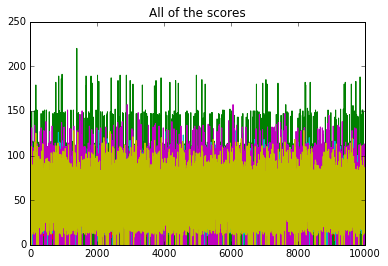

In [37]:
plt.plot(hans_solo_scores)
plt.plot(risky_chick_scores)
plt.plot(safe_sam_scores)
plt.plot(tony_scores)
plt.plot(tammy_scores)
plt.plot(tommi_scores)
plt.title('All of the scores')
plt.show()

This is a plot of all of the scores by each player. It is not helpful, but it looks cool.

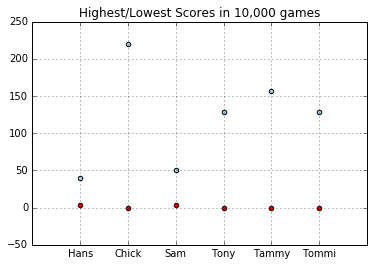

In [48]:
highest_scores = [max(scores) for scores in [hans_solo_scores, risky_chick_scores, safe_sam_scores, tony_scores, tammy_scores, tommi_scores]]
lowest_scores = [min(scores) for scores in [hans_solo_scores, risky_chick_scores, safe_sam_scores, tony_scores, tammy_scores, tommi_scores]]
players = ['Hans', 'Chick', 'Sam', 'Tony', 'Tammy', 'Tommi']
plt.scatter(range(len(players)), highest_scores, c='lightblue')
plt.scatter(range(6), lowest_scores, c='red')
plt.xticks(range(6), players)
plt.title("Highest/Lowest Scores in 10,000 games")
plt.grid(True)
plt.show()

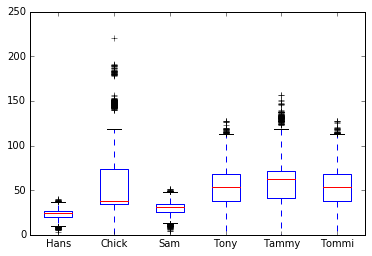

In [39]:
plt.boxplot([hans_solo_scores, risky_chick_scores, safe_sam_scores, tony_scores, tammy_scores, tommi_scores])
plt.xticks(range(1,7), players)
plt.show()

This boxplot shows that, although the Risky player gets the highest scores, their mean score is relatively low. Tony (the player that always rolls four times, Tammy (the player that rolls until they reach 20) and Tommi (the player that holds whenever either of those conditions is met) have fairly similar data.

[0, 2229, 0, 108, 361, 99]
[0.0, 22.29, 0.0, 1.08, 3.61, 0.99]


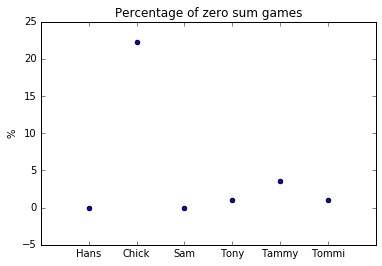

In [42]:
zeros = [scores.count(0) for scores in [hans_solo_scores, risky_chick_scores, safe_sam_scores, tony_scores, tammy_scores, tommi_scores]]
print(zeros)
occurance_of_zeros = [x / 100 for x in zeros]
print(occurance_of_zeros)

plt.scatter(range(len(players)), occurance_of_zeros)
plt.xticks(range(len(players)), players)
plt.title('Percentage of zero sum games')
plt.ylabel('%')
plt.show()

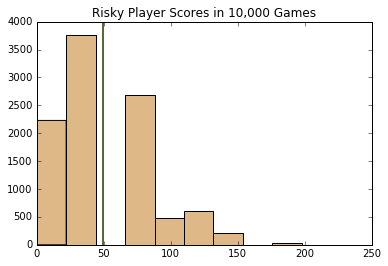

In [44]:
plt.hist(risky_chick_scores, color='burlywood')
ymin, ymax = plt.ylim()
plt.vlines(risky_chick_avg, ymin, ymax, lw=2.0, color='darkolivegreen')
plt.title('Risky Player Scores in 10,000 Games')
plt.show()

As evidenced by the scatter plot of zero sum games and the histogram of risky player scores, although the risky player achieves the highest scores, it is more than twice as likely that she will end the game with a score of zero.

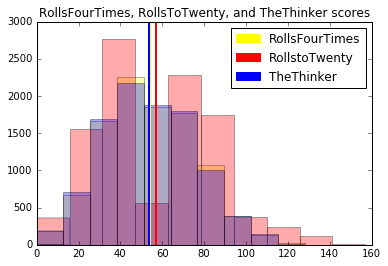

In [45]:
plt.hist(tony_scores, color='yellow', alpha=.33)
plt.hist(tammy_scores, color='red', alpha=.33)
plt.hist(tommi_scores, color='blue', alpha=.33)
ymin, ymax = plt.ylim()
plt.vlines(tammy_avg, ymin, ymax, color='red', lw=2.0)
plt.vlines(tony_avg, ymin, ymax, color='yellow', lw=2.0)
plt.vlines(tommi_avg, ymin, ymax, color='blue', lw=2.0)
plt.title('RollsFourTimes, RollsToTwenty, and TheThinker scores')
red_patch = mpatches.Patch(color='red', label='RollstoTwenty')
blue_patch = mpatches.Patch(color='blue', label='TheThinker')
yellow_patch = mpatches.Patch(color='yellow', label='RollsFourTimes')
plt.legend(handles=[yellow_patch, red_patch, blue_patch])
plt.show()

All three of these players do reasonably well. Any one player may have the highest mean after a trial of 100 games. After a trial of 1000 games, Tammy (the player that rolls unless they've reached 20 points) leads the other two by mean. After a trial of 10,000 games, the her mean score is 57.05. However, she also has the greatest percentage of zero sum games.

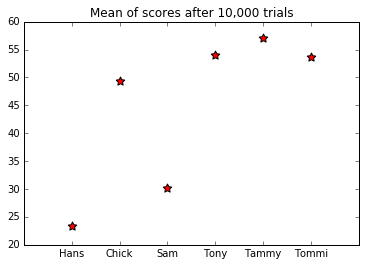

In [46]:
plt.scatter(range(len(players)), [hans_solo_avg, risky_chick_avg, safe_sam_avg, tony_avg, tammy_avg, tommi_avg], s=80, marker=(5, 1), c='red')
plt.xticks(range(6), players)
plt.title("Mean of scores after 10,000 trials")
plt.show()